## PBL height from HREF data

In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import xarray as xr

## READ data
* csv file was created from vmix files 
* vmixing was run on each member of the HREF 
* options -a2 and -w1 were utilized.
* defaults used for rest.
* location was 38.8952 -77.0251 Hoover building

In [41]:
# The columns are the different members of the ensemble.
# There are ten members.
%autoreload
tdir = '../data'
mixht = pd.read_csv(os.path.join(tdir,'HREF_mixht.csv'),parse_dates=['date'])
mixht.set_index('date',inplace=True)  
#mixht['mean'] = mixht.mean(axis=1)
#mixht['std']= mixht.std(axis=1)

In [7]:
mlist = ['m{:02d}'.format(x) for x in np.arange(1,11)]
print(mlist)

['m01', 'm02', 'm03', 'm04', 'm05', 'm06', 'm07', 'm08', 'm09', 'm10']


In [39]:
# Take the dataframe and add another column with the LIDAR estimated PBLH. 
type(mixht.index.values[0])

numpy.datetime64

str

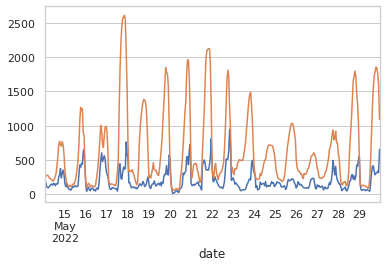

In [42]:
std = mixht.std(axis=1)
std.plot()
fig = plt.gcf()
fig.autofmt_xdate()
mean = mixht.mean(axis=1)
mean.plot()
fig = plt.gcf()
fig.autofmt_xdate()

2022-05-14 00:00:00 2022-05-17 00:00:00


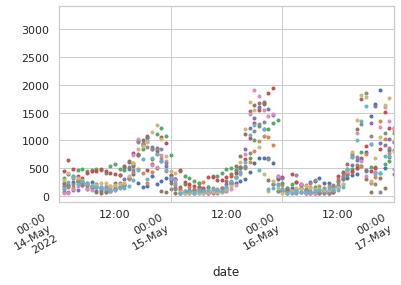

In [44]:
sns.set_style('whitegrid')
mixht.plot(legend=False, style='.')
fig = plt.gcf()
fig.autofmt_xdate()
ax = plt.gca()
d1 = datetime.datetime(2022,5,14,0)
d2 = d1 + datetime.timedelta(hours=72)
print(d1,d2)
ax.set_xlim(d1,d2)
#ax.set_ylim(0,500)
plt.show()

In [21]:
dset = xr.open_dataset('test.nc')

In [22]:
dset

<xarray.Dataset>
Dimensions:                        (date: 383, dim_0: 25, ens: 10, sid: 1)
Coordinates:
  * dim_0                          (dim_0) float64 0.01 0.055 ... 11.16 12.13
  * date                           (date) datetime64[ns] 2022-05-14T01:00:00 ...
  * ens                            (ens) object 'm09' 'm07' ... 'm10' 'm01'
  * sid                            (sid) object 'C1'
Data variables:
    __xarray_dataarray_variable__  (sid, ens, dim_0, date) float64 ...

## Try a rank histogram



## Rank histogram.
- order each row values from greatest to least
- marks where in the order the observation is.
-- if observation is lowest then it gets rank 0
-- if observation is highest then it gets rank 11
-- then create histogram with the ranks of each observation.

If your ensemble is well constructed then the rank histogram is flat. 

In [26]:
import rank

In [27]:
test = rank.Talagrand(thresh=0,nbins=11)

In [28]:
# make some fake data by pretending one of the ensemble members is observations.
rankdata = mixht.copy()
rankdata['obs'] = mixht['m01']
rankdata

,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,obs
date,,,,,,,,,,,
2022-05-14 01:00:00,187.4,223.0,319.8,449.1,74.17,241.4,50.05,122.9,284.1,153.0,187.4
2022-05-14 02:00:00,401.1,158.6,196.0,647.1,79.01,199.9,54.15,185.2,420.8,256.2,401.1
2022-05-14 03:00:00,260.9,171.3,352.3,480.9,116.90,321.8,119.00,210.9,338.1,357.7,260.9
2022-05-14 04:00:00,251.4,296.1,464.9,352.3,112.60,293.0,174.80,269.7,322.8,217.2,251.4
2022-05-14 05:00:00,252.8,242.6,491.8,330.6,229.00,191.6,193.80,194.0,295.5,261.9,252.8
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-29 19:00:00,1306.0,1395.0,1945.0,1992.0,1842.00,1807.0,2332.00,1917.0,2122.0,1898.0,1306.0
2022-05-29 20:00:00,1380.0,1292.0,1926.0,1932.0,1797.00,1911.0,2296.00,1780.0,2134.0,2000.0,1380.0
2022-05-29 21:00:00,1415.0,1084.0,1931.0,1886.0,1622.00,1679.0,2181.00,1646.0,2180.0,1895.0,1415.0


In [29]:
%autoreload
test.add_data(rankdata)
#[x for x in rankdata.columns if 'obs' in x]

['obs']


In [30]:
test.binra

array([18.        , 36.        , 37.5       , 36.16666667, 39.83333333,
       44.66666667, 36.5       , 34.33333333, 42.83333333, 40.33333333,
       16.83333333])

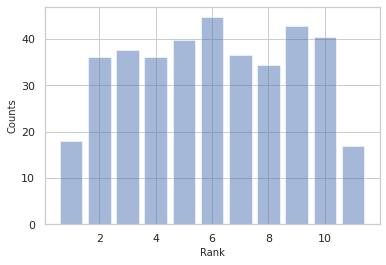

In [31]:

test.plotrank()